In [1]:
import numpy as np
import pandas as pd
import requests as req
import urllib
from PIL import Image
from io import BytesIO
import cv2
import matplotlib.pyplot as plt
from skimage.color import rgb2hsv
import os

In [2]:
def extFeature(img_src):
    img = cv2.imread(img_src)
    color = ('b', 'g', 'r')
    histRGB = []
    for i,col in enumerate(color):
        hist = cv2.calcHist([img], [i], None, [256], [0,256])
        histRGB.append(hist)
    
    imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    histGrey = cv2.calcHist([imgGrey], [0], None, [256], [0,256])
    meanGrey = np.mean(imgGrey)
    stdGrey = np.std(imgGrey)
    
    color = ('h', 's', 'v')
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    histHue = cv2.calcHist([img], [0], None, [256], [0,256])
    maxHue = np.argmax(histHue)
    
    return histRGB, histGrey, meanGrey, stdGrey, maxHue

In [3]:
imageFeature = pd.DataFrame(columns=['photoNum', 'RGBHists', 'greyHists', 'meanGrey', 'stdGrey', 'maxHue'])

In [4]:
path = 'data/images_sample' 
files = os.listdir(path)
fileList = []
for file in files:
    subpath = os.path.join(path, file)
    if os.path.isdir(subpath):
        images = os.listdir(subpath)
        imageFeature.loc[file] = len(images)
        RGBList = []
        greyList = []
        meanList = []
        stdList = []
        maxList = []
        for image_src in images:
            histRGB, histGrey, meanGrey, stdGrey, maxHue = extFeature(os.path.join(subpath, image_src))
            RGBList.append(histRGB)
            greyList.append(histGrey)
            meanList.append(meanGrey)
            stdList.append(stdGrey)
            maxList.append(stdGrey)
        imageFeature.loc[file] = {'photoNum':len(images), 'RGBHists': RGBList, 'greyHists': greyList, 'meanGrey':meanList, 'stdGrey': stdList, 'maxHue': maxList}

In [5]:
imageFeature

,photoNum,RGBHists,greyHists,meanGrey,stdGrey,maxHue
6812051,4,"[[[[272.], [561.], [1036.], [1486.], [2182.], ...","[[[2.0], [18.0], [23.0], [83.0], [248.0], [322...","[90.12154622395833, 105.38919596354167, 108.48...","[57.18824893024921, 52.73708558902206, 65.8400...","[57.18824893024921, 52.73708558902206, 65.8400..."
6812263,6,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[145.28329561281336, 158.02139188718664, 139.9...","[34.13911675322706, 30.348497805058706, 37.375...","[34.13911675322706, 30.348497805058706, 37.375..."
6812264,2,"[[[[157.], [129.], [152.], [177.], [216.], [35...","[[[0.0], [17.0], [60.0], [124.0], [195.0], [33...","[133.07743019311064, 165.72943808685446]","[64.58462088575449, 52.235490666962164]","[64.58462088575449, 52.235490666962164]"
6812002,0,[],[],[],[],[]
6812005,0,[],[],[],[],[]
6812208,0,[],[],[],[],[]
6812201,4,"[[[[45.], [16.], [29.], [66.], [86.], [99.], [...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[127.97053990610328, 161.30269953051643, 136.3...","[62.21510358825447, 33.98761893619457, 54.5228...","[62.21510358825447, 33.98761893619457, 54.5228..."
6812033,1,"[[[[7.], [14.], [44.], [59.], [56.], [89.], [1...","[[[0.0], [0.0], [0.0], [0.0], [1.0], [10.0], [...",[140.17101141686183],[40.575591461912936],[40.575591461912936]
6812239,3,"[[[[0.], [0.], [0.], [0.], [0.], [0.], [0.], [...","[[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0...","[127.14380208333333, 127.977158203125, 108.941...","[37.30402164105428, 30.66365846172834, 50.5269...","[37.30402164105428, 30.66365846172834, 50.5269..."
6812050,4,"[[[[2743.], [2735.], [3208.], [3593.], [4015.]...","[[[0.0], [0.0], [4.0], [21.0], [111.0], [372.0...","[117.8551953125, 131.13735320981212, 133.09920...","[71.67853162688122, 51.226118330450895, 56.732...","[71.67853162688122, 51.226118330450895, 56.732..."


(425, 640, 3)


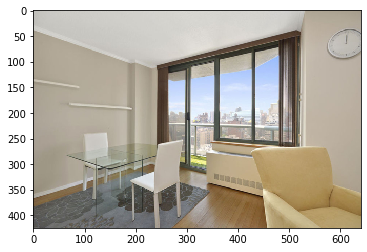

In [6]:
img_src = 'data/images_sample/6811958/6811958_1fe0076c8b481e0af2223afab02503da.jpg'
img = cv2.imread(img_src, 1)
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

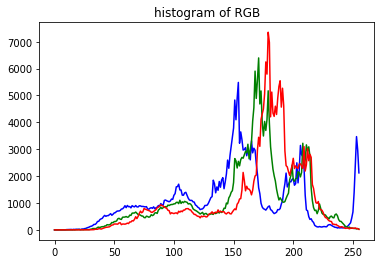

In [7]:
color = ('b','g','r')
plt.title('histogram of RGB')
for i,col in enumerate(color):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)

mean of grey value:  162.02073161764707
std of grey value: 42.95114059356591


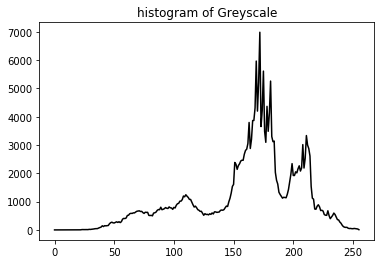

In [8]:
imgGrey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([imgGrey], [0], None, [256], [0,256])
plt.title('histogram of Greyscale')
plt.plot(hist, color='k')
mean = np.mean(imgGrey)
std = np.std(imgGrey)
print('mean of grey value: ', mean)
print('std of grey value:', std)

hue value with maximal amount: 19


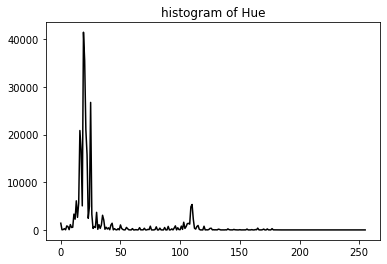

In [9]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hist = cv2.calcHist([imgHSV], [0], None, [256], [0,256])
plt.title('histogram of Hue')
plt.plot(hist, color='k')
print('hue value with maximal amount:', np.argmax(hist))